### LAB 2
We can use only the following generators from numpy:
- Uniform(0,1)
- Exponential($\lambda$)
- Normal($0, 1$)
- Poisson($\lambda$)

xrange > range  -  this is outdated info XD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import timeit
np.random.seed(2137)

### TASK A

In [2]:
def generate_poisson_trajectory(lam, time):
    t = 0
    trajectory = []
    while t < time:
        t += np.random.exponential(1.0 / lam)
        trajectory.append(t)
    return trajectory
print(generate_poisson_trajectory(1, 10))

[0.10155114947715882, 0.8360296691037324, 3.7767182089851725, 3.8638897136469312, 4.157940713713034, 5.01000531522199, 6.729224752299112, 7.786938894416638, 8.78951927016844, 10.314795287374945]


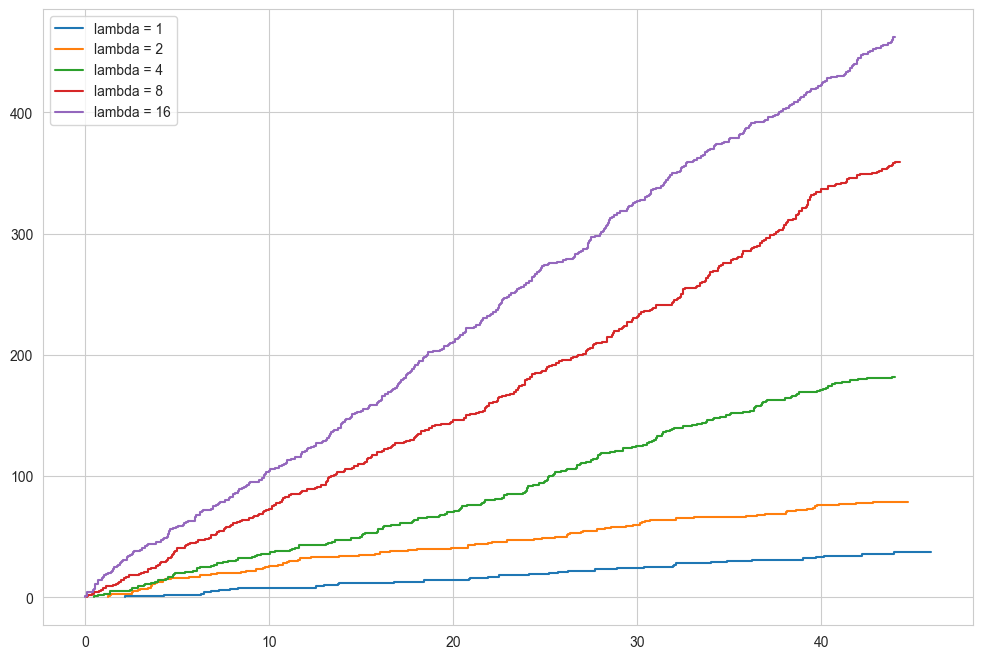

In [3]:
# plot 5 different trajectories for Poisson process with lambda 1,2,4,8,22 with time = 1000000
trajectories = [generate_poisson_trajectory(lam, 44) for lam in [1, 2, 4, 8, 10]]
# plot on one plot with different colors and legend
plt.figure(figsize=(12, 8))
for i, trajectory in enumerate(trajectories):
    plt.step(trajectory, range(len(trajectory)), label=f'lambda = {2 ** i}')
plt.legend()
plt.show()

### TASK B

#### First Method
$ W_{t_{k+1}} = W_{t_k} + \sqrt{t_{k+1}-t_k} Z_k $
where $Z_k \sim N(0, 1)$

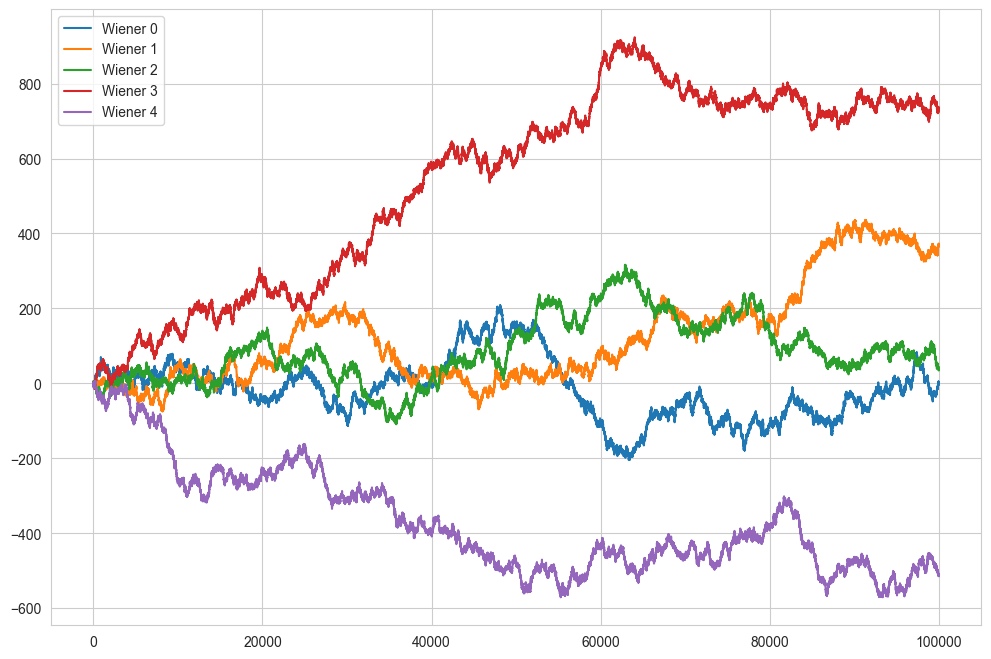

In [4]:
def generate_wiener_trajectory(length:int , per_one:int=1):
    trajectory = [0]
    for i in range(length):
        trajectory.append(trajectory[-1] + np.sqrt(per_one) * np.random.normal())
    return trajectory

# plot 5 different trajectories for Wiener process with time = 1000000
trajectories = [generate_wiener_trajectory(100000) for _ in range(5)]
# plot on one plot with different colors and legend
plt.figure(figsize=(12, 8))
for i, trajectory in enumerate(trajectories):
    plt.plot(trajectory, label=f'Wiener {i}')
plt.legend()
plt.show()

#### Second Method 
Cholesky decomposition of the covariance matrix
$
\Sigma = \begin{pmatrix}
t_1 & t_1 & t_1 & \cdots & t_1 \\
t_1 & t_2 & t_2 & \cdots & t_2 \\
t_1 & t_2 & t_3 & \cdots & t_3 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
t_1 & t_2 & t_3 & \cdots & t_n
\end{pmatrix}
$


In [5]:
last_t = 10
sigma_matrix = np.array([[min(i, j) for j in range(1, last_t)] for i in range(1, last_t)])
print(sigma_matrix)

[[1 1 1 1 1 1 1 1 1]
 [1 2 2 2 2 2 2 2 2]
 [1 2 3 3 3 3 3 3 3]
 [1 2 3 4 4 4 4 4 4]
 [1 2 3 4 5 5 5 5 5]
 [1 2 3 4 5 6 6 6 6]
 [1 2 3 4 5 6 7 7 7]
 [1 2 3 4 5 6 7 8 8]
 [1 2 3 4 5 6 7 8 9]]


In [6]:
def cholesky(S): # S - symmetric positive-definite matrix
    n = len(S)
    L = [[0.0] * n for _ in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L
L=cholesky(sigma_matrix)
print(np.dot(L, np.transpose(L)))

[[1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 2. 2. 2. 2. 2. 2. 2. 2.]
 [1. 2. 3. 3. 3. 3. 3. 3. 3.]
 [1. 2. 3. 4. 4. 4. 4. 4. 4.]
 [1. 2. 3. 4. 5. 5. 5. 5. 5.]
 [1. 2. 3. 4. 5. 6. 6. 6. 6.]
 [1. 2. 3. 4. 5. 6. 7. 7. 7.]
 [1. 2. 3. 4. 5. 6. 7. 8. 8.]
 [1. 2. 3. 4. 5. 6. 7. 8. 9.]]


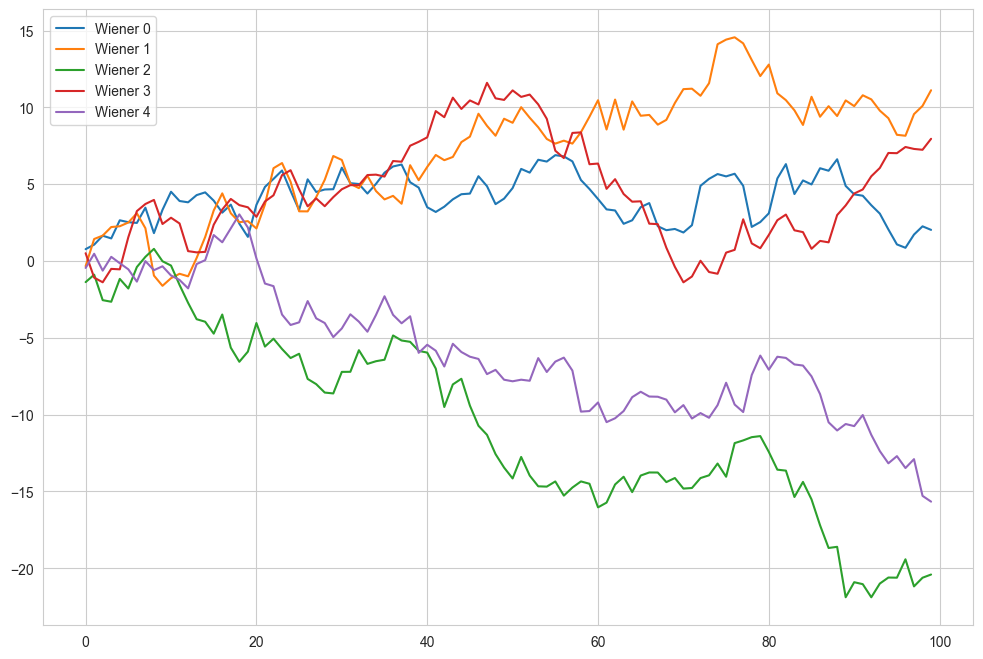

In [7]:
def generate_wiener_trajectory_cholesky(length:int , per_one:int=1):
    sigma_matrix = np.array([[min(i, j) for j in range(1, length+1, per_one)] for i in range(1, length+1, per_one)])
    L = cholesky(sigma_matrix)
    random_normal = np.random.normal(size=length)
    trajectory = np.dot(L, random_normal)
    return trajectory
trajectories = [generate_wiener_trajectory_cholesky(100) for _ in range(5)] #it is better to create L matrix once and then use it in multiple runs
plt.figure(figsize=(12, 8))
for i, trajectory in enumerate(trajectories):
    plt.plot(trajectory, label=f'Wiener {i}')
plt.legend()
plt.show()

#### Time comparison
I will compare the time of generating Wiener process using two methods

In [8]:
time1 = timeit.timeit('generate_wiener_trajectory(100)', globals=globals(), number=100)
time2 = timeit.timeit('generate_wiener_trajectory_cholesky(100)', globals=globals(), number=100)
print(f'Time for first method: {time1}')
print(f'Time for second method: {time2}')

Time for first method: 0.009708833007607609
Time for second method: 6.527715332980733


In [9]:
print(f'First method is {time2/time1} times faster')

First method is 672.3480904312364 times faster


### TASK C
We will generate two dimensional Wiener process 

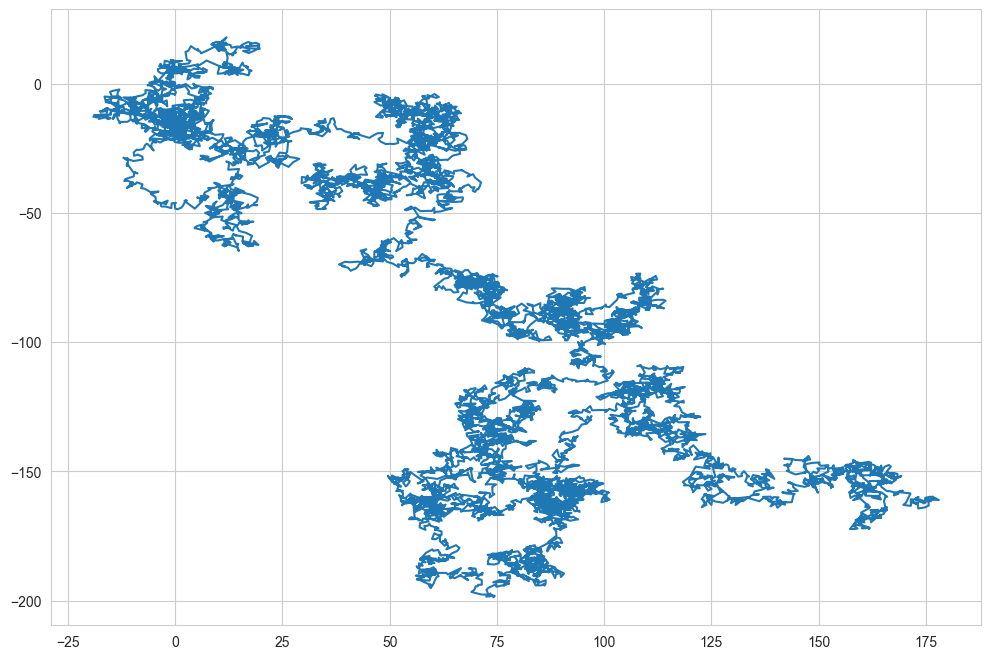

In [10]:
trajectory1 = generate_wiener_trajectory(10000)
trajectory2 = generate_wiener_trajectory(10000)
plt.figure(figsize=(12, 8))
plt.plot(trajectory1, trajectory2)
plt.show()

### TASK D

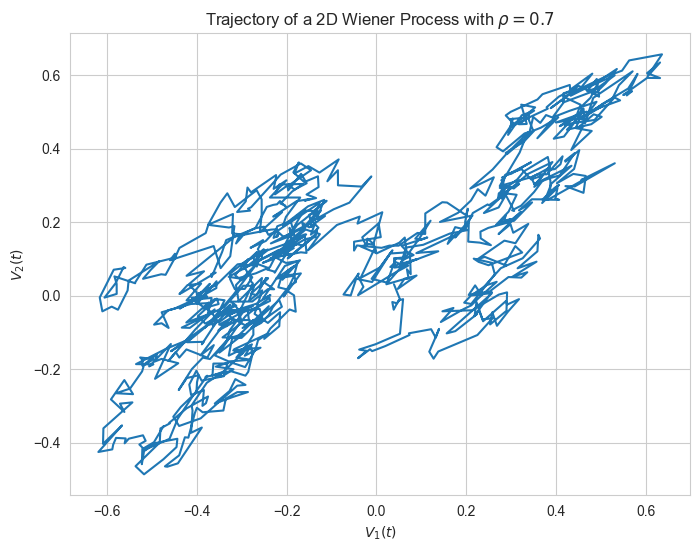

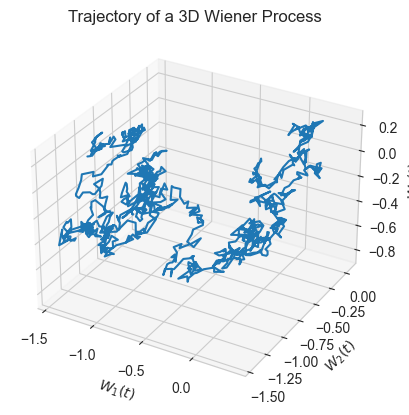

In [11]:
def correlated_wiener_process(rho, T, n):
    """
    Generates and visualizes a trajectory of a two-dimensional Wiener process with correlation rho.

    Parameters:
    rho (float): Correlation coefficient in the range [-1, 1].
    T (float): Total time of the process.
    n (int): Number of time steps.

    Returns:
    None (displays the trajectory plot).
    """

    dt = T / n  # Time step
    t = np.linspace(0, T, n + 1)  # Time vector

    # Generate independent standard Wiener processes
    W1 = np.cumsum(np.sqrt(dt) * np.random.randn(n), axis=0)
    W2 = np.cumsum(np.sqrt(dt) * np.random.randn(n), axis=0)

    # Calculate the correlated Wiener process
    V1 = W1
    V2 = rho * W1 + np.sqrt(1 - rho**2) * W2

    # Visualize the trajectory
    plt.figure(figsize=(8, 6))
    plt.plot(V1, V2)
    plt.xlabel('$V_1(t)$')
    plt.ylabel('$V_2(t)$')
    plt.title(f'Trajectory of a 2D Wiener Process with $\\rho = {rho}$')
    plt.grid(True)
    plt.show()

def d_dimensional_wiener_process(corr_matrix, T, n):
    """
    Generates and returns a trajectory of a d-dimensional Wiener process.

    Parameters:
    corr_matrix (np.array): Correlation matrix (d x d).
    T (float): Total time of the process.
    n (int): Number of time steps.

    Returns:
    np.array: Trajectory of the d-dimensional Wiener process.
    """

    d = corr_matrix.shape[0]  # Dimension of the process
    dt = T / n  # Time step
    t = np.linspace(0, T, n + 1)  # Time vector

    # Cholesky decomposition of the correlation matrix
    A = np.array(cholesky(corr_matrix))

    # Generate independent random variables
    Z = np.random.randn(n, d)

    # Calculate the Wiener process trajectory
    dW = np.sqrt(dt) * Z @ A.T
    W = np.cumsum(dW, axis=0)

    return W

# Example usage for 2D Wiener process
rho = 0.7  # Correlation coefficient
T = 1.0    # Total time
n = 1000   # Number of time steps

correlated_wiener_process(rho, T, n)

# Example usage for 3D Wiener process
corr_matrix = np.array([
    [1.0, 0.5, 0.3],
    [0.5, 1.0, 0.2],
    [0.3, 0.2, 1.0]
])

T = 1.0
n = 1000

W = d_dimensional_wiener_process(corr_matrix, T, n)

# Visualize the 3D trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(W[:, 0], W[:, 1], W[:, 2])
ax.set_xlabel('$W_1(t)$')
ax.set_ylabel('$W_2(t)$')
ax.set_zlabel('$W_3(t)$')
plt.title('Trajectory of a 3D Wiener Process')
plt.show()

### TASK E

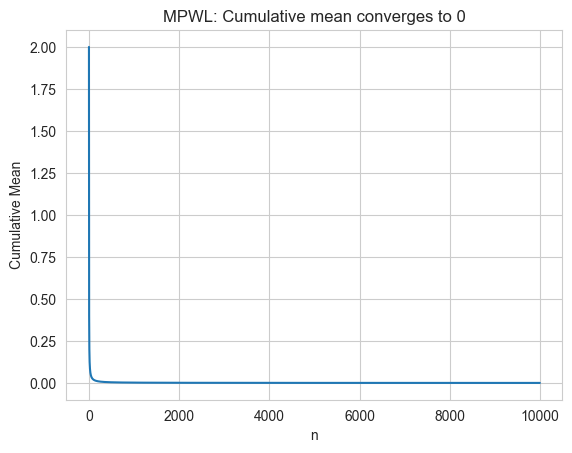

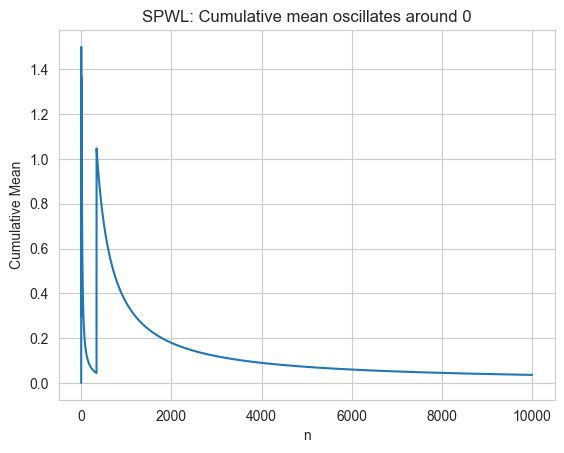

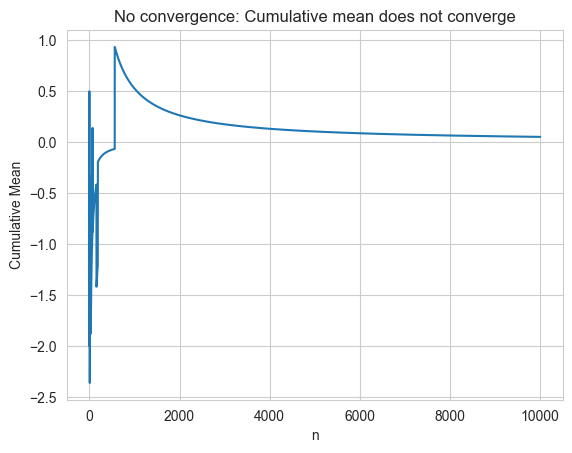

In [12]:
def simulate_sequence(probabilities, sequence_length):
    """
    Simulates a sequence of random variables based on given probabilities.
    
    Parameters:
    probabilities (function): Function generating probabilities for each n.
    sequence_length (int): Length of the sequence.
    
    Returns:
    list: Sequence of random variables.
    """
    sequence = []
    for n in range(1, sequence_length + 1):
        prob_pos, prob_neg, prob_zero = probabilities(n)
        rand_val = np.random.uniform(0, 1)
        if rand_val < prob_pos:
            sequence.append(n + 1)
        elif rand_val < prob_pos + prob_neg:
            sequence.append(-(n + 1))
        else:
            sequence.append(0)
    return sequence

def calculate_cumulative_mean(sequence):
    """
    Calculates the cumulative mean for a given sequence.

    Parameters:
    sequence (list): Sequence of random variables.

    Returns:
    list: Cumulative means.
    """
    cumulative_sum = np.cumsum(sequence)
    cumulative_mean = cumulative_sum / np.arange(1, len(sequence) + 1)
    return cumulative_mean

def plot_cumulative_mean(cumulative_means, title):
    """
    Plots the cumulative means.

    Parameters:
    cumulative_means (list): List of cumulative means.
    title (str): Title of the plot.
    """
    plt.plot(cumulative_means)
    plt.title(title)
    plt.xlabel('n')
    plt.ylabel('Cumulative Mean')
    plt.grid(True)
    plt.show()

# Probability definitions for MPWL, SPWL, and no convergence
def probabilities_mpwl(n):
    prob_pos = 1 / (2 * (n + 1)**(3/2))
    prob_neg = 1 / (2 * (n + 1)**(3/2))
    prob_zero = 1 - 1 / (n + 1)**(3/2)
    return prob_pos, prob_neg, prob_zero

def probabilities_spwl(n):
    prob_pos = 1 / (2 * (n + 1) * np.log(n + 1))
    prob_neg = 1 / (2 * (n + 1) * np.log(n + 1))
    prob_zero = 1 - 1 / ((n + 1) * np.log(n + 1))
    return prob_pos, prob_neg, prob_zero

def probabilities_no_convergence(n):
    prob_pos = 1 / (2 * (n + 1))
    prob_neg = 1 / (2 * (n + 1))
    prob_zero = 1 - 1 / (n + 1)
    return prob_pos, prob_neg, prob_zero

# Simulation and visualization
sequence_length = 10000
skip = 0

# MPWL
sequence_mpwl = simulate_sequence(probabilities_mpwl, sequence_length)
cumulative_means_mpwl = calculate_cumulative_mean(sequence_mpwl)
cumulative_means_mpwl = cumulative_means_mpwl[skip:]
plot_cumulative_mean(cumulative_means_mpwl, 'MPWL: Cumulative mean converges to 0')

# SPWL
sequence_spwl = simulate_sequence(probabilities_spwl, sequence_length)
cumulative_means_spwl = calculate_cumulative_mean(sequence_spwl)
cumulative_means_spwl = cumulative_means_spwl[skip:]
plot_cumulative_mean(cumulative_means_spwl, 'SPWL: Cumulative mean oscillates around 0')

# No convergence
sequence_no_convergence = simulate_sequence(probabilities_no_convergence, sequence_length)
cumulative_means_no_convergence = calculate_cumulative_mean(sequence_no_convergence)
cumulative_means_no_convergence = cumulative_means_no_convergence[skip:]
plot_cumulative_mean(cumulative_means_no_convergence, 'No convergence: Cumulative mean does not converge')

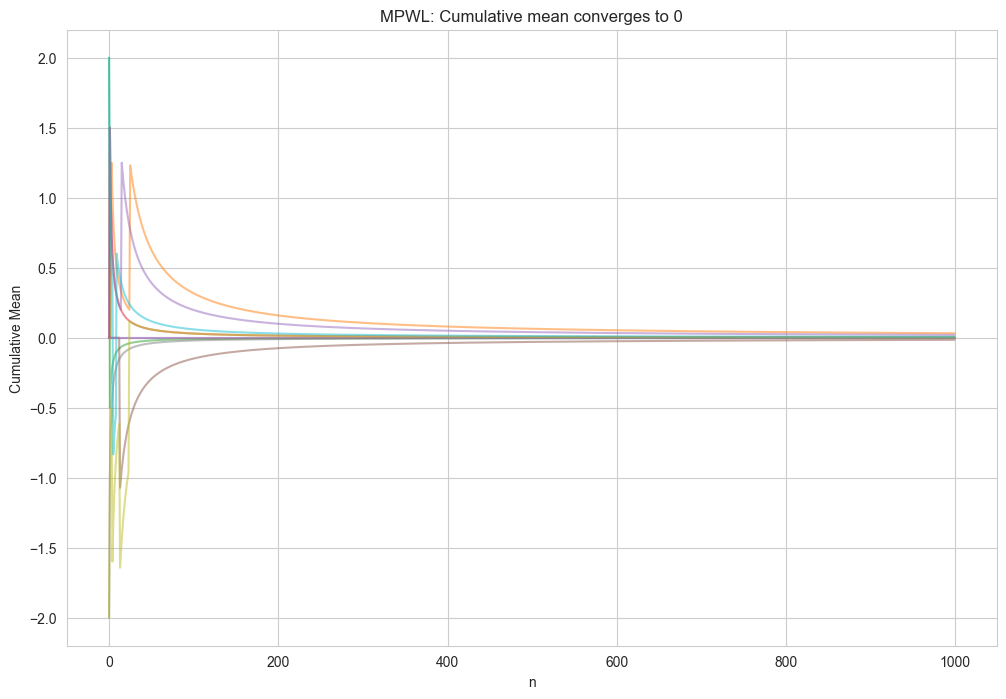

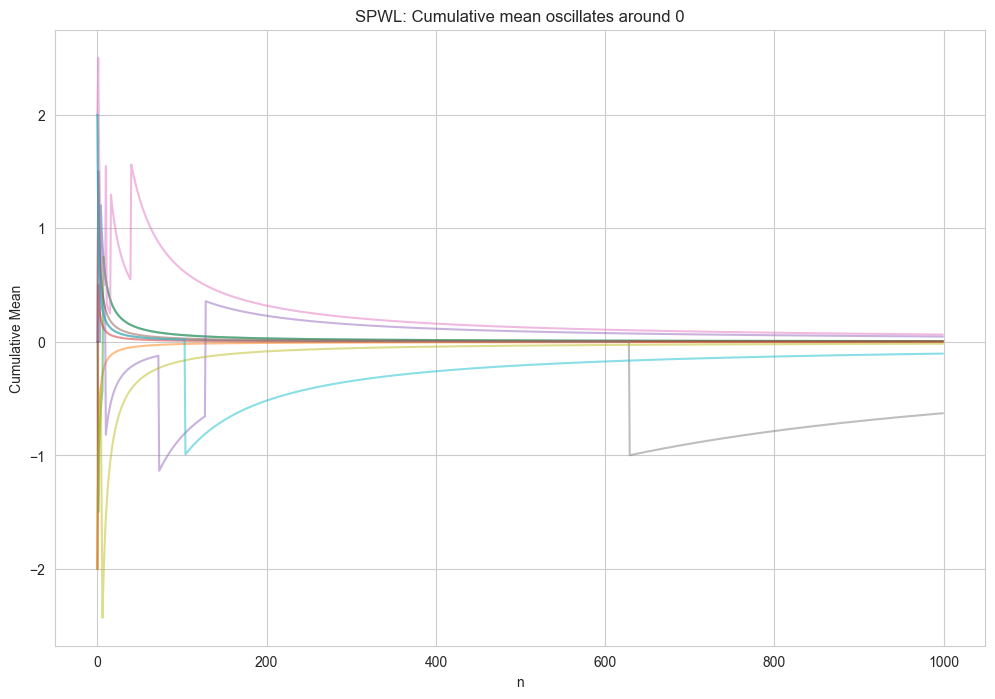

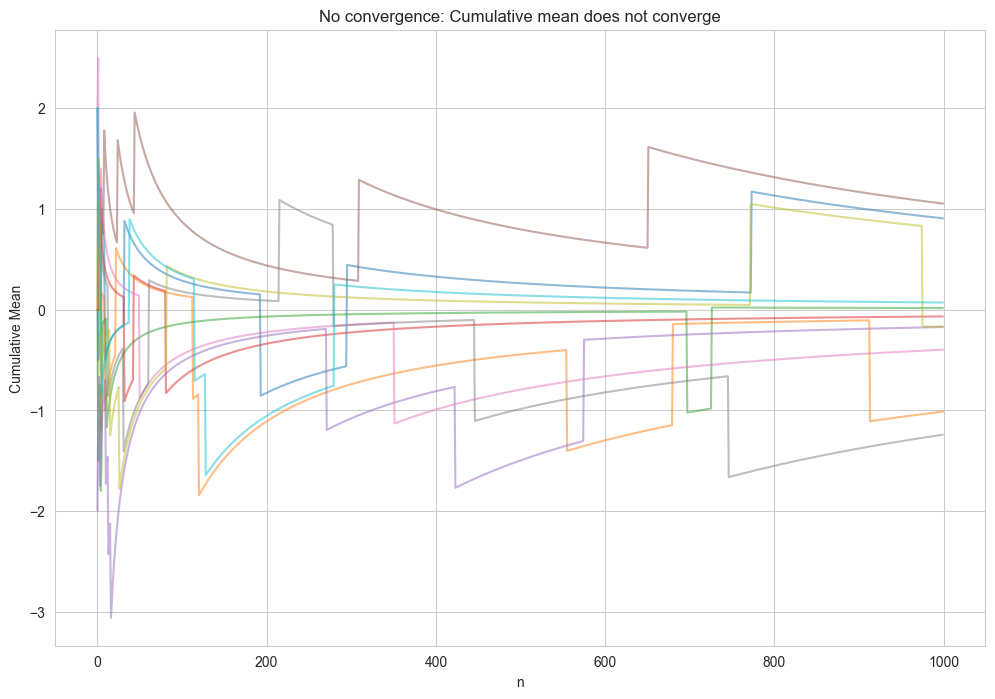

In [19]:
sequence_length = 1000
sequences_mpwl = [simulate_sequence(probabilities_mpwl, sequence_length) for _ in range(10)]
cumulative_means_mpwl = [calculate_cumulative_mean(sequence)[skip:] for sequence in sequences_mpwl]
#plot 10 different trajectories for MPWL
plt.figure(figsize=(12, 8))
for i, cumulative_means in enumerate(cumulative_means_mpwl):
    plt.plot(cumulative_means, alpha=0.5)
plt.title('MPWL: Cumulative mean converges to 0')
plt.xlabel('n')
plt.ylabel('Cumulative Mean')
plt.grid(True)
plt.show()

sequences_spwl = [simulate_sequence(probabilities_spwl, sequence_length) for _ in range(10)]
cumulative_means_spwl = [calculate_cumulative_mean(sequence)[skip:] for sequence in sequences_spwl]
#plot 10 different trajectories for SPWL
plt.figure(figsize=(12, 8))
for i, cumulative_means in enumerate(cumulative_means_spwl):
    plt.plot(cumulative_means, alpha=0.5)
plt.title('SPWL: Cumulative mean oscillates around 0')
plt.xlabel('n')
plt.ylabel('Cumulative Mean')
plt.grid(True)
plt.show()
sequence_no_convergence = [simulate_sequence(probabilities_no_convergence, sequence_length) for _ in range(10)]
cumulative_means_no_convergence = [calculate_cumulative_mean(sequence)[skip:] for sequence in sequence_no_convergence]
#plot 10 different trajectories for No convergence
plt.figure(figsize=(12, 8))
for i, cumulative_means in enumerate(cumulative_means_no_convergence):
    plt.plot(cumulative_means, alpha=0.5)
plt.title('No convergence: Cumulative mean does not converge')
plt.xlabel('n')
plt.ylabel('Cumulative Mean')
plt.grid(True)
plt.show()

### TASK F

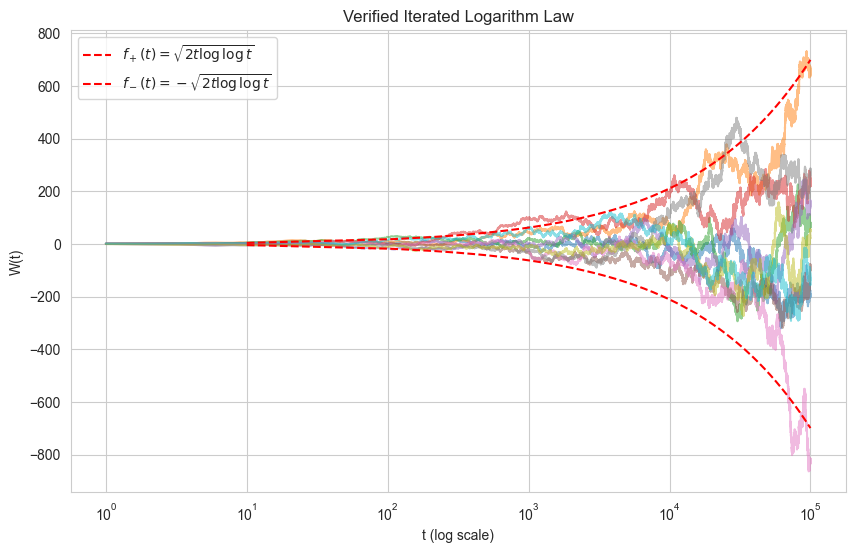

In [14]:
def iterated_logarithm_functions(t):
    return np.sqrt(2 * t * np.log(np.log(t)))

def verify_iterated_logarithm_law(T, n, num_trajectories=10):
    plt.figure(figsize=(10, 6))

    t_values = np.linspace(0, T, n + 1)[1:]  
    for _ in range(num_trajectories):
        W = generate_wiener_trajectory(n)
        plt.plot(t_values, W[1:], alpha=0.5)

    t_plot = np.linspace(10, T, 1000)  
    f_plus = iterated_logarithm_functions(t_plot)
    f_minus = -iterated_logarithm_functions(t_plot)
    plt.plot(t_plot, f_plus, 'r--', label=r'$f_+(t) = \sqrt{2t \log \log t}$')
    plt.plot(t_plot, f_minus, 'r--', label=r'$f_-(t) = -\sqrt{2t \log \log t}$')

    plt.xscale('log')
    plt.xlabel('t (log scale)')
    plt.ylabel('W(t)')
    plt.title('Verified Iterated Logarithm Law')
    plt.legend()
    plt.grid(True)
    plt.show()


T = 100000  # Big T
n = 100000  # Number of time steps
num_trajectories = 10  # Number of trajectories

verify_iterated_logarithm_law(T, n, num_trajectories)